In [1]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [2]:
dataset_folder = '../../../datasets/'
feature_names = ["Age", "Workclass", "fnlwgt", "Education",
                         "Education-Num", "Marital Status", "Occupation",
                         "Relationship", "Race", "Sex", "Capital Gain",
                         "Capital Loss", "Hours per week", "Country", 'Income']
#features_to_use = [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
features_to_use = [0, 1, 5, 7, 8, 9, 10, 11, 12]
#categorical_features = [1, 3, 5, 6, 7, 8, 9, 10, 11, 13]
categorical_features = [1, 5, 7, 8, 9, 10, 11]
education_map = {
    '10th': 'Dropout', '11th': 'Dropout', '12th': 'Dropout', '1st-4th':
    'Dropout', '5th-6th': 'Dropout', '7th-8th': 'Dropout', '9th':
    'Dropout', 'Preschool': 'Dropout', 'HS-grad': 'High School grad',
    'Some-college': 'High School grad', 'Masters': 'Masters',
    'Prof-school': 'Prof-School', 'Assoc-acdm': 'Associates',
    'Assoc-voc': 'Associates',
}
occupation_map = {
    "Adm-clerical": "Admin", "Armed-Forces": "Military",
    "Craft-repair": "Blue-Collar", "Exec-managerial": "White-Collar",
    "Farming-fishing": "Blue-Collar", "Handlers-cleaners":
    "Blue-Collar", "Machine-op-inspct": "Blue-Collar", "Other-service":
    "Service", "Priv-house-serv": "Service", "Prof-specialty":
    "Professional", "Protective-serv": "Other", "Sales":
    "Sales", "Tech-support": "Other", "Transport-moving":
    "Blue-Collar",
}
country_map = {
    'Cambodia': 'SE-Asia', 'Canada': 'British-Commonwealth', 'China':
    'China', 'Columbia': 'South-America', 'Cuba': 'Other',
    'Dominican-Republic': 'Latin-America', 'Ecuador': 'South-America',
    'El-Salvador': 'South-America', 'England': 'British-Commonwealth',
    'France': 'Euro_1', 'Germany': 'Euro_1', 'Greece': 'Euro_2',
    'Guatemala': 'Latin-America', 'Haiti': 'Latin-America',
    'Holand-Netherlands': 'Euro_1', 'Honduras': 'Latin-America',
    'Hong': 'China', 'Hungary': 'Euro_2', 'India':
    'British-Commonwealth', 'Iran': 'Other', 'Ireland':
    'British-Commonwealth', 'Italy': 'Euro_1', 'Jamaica':
    'Latin-America', 'Japan': 'Other', 'Laos': 'SE-Asia', 'Mexico':
    'Latin-America', 'Nicaragua': 'Latin-America',
    'Outlying-US(Guam-USVI-etc)': 'Latin-America', 'Peru':
    'South-America', 'Philippines': 'SE-Asia', 'Poland': 'Euro_2',
    'Portugal': 'Euro_2', 'Puerto-Rico': 'Latin-America', 'Scotland':
    'British-Commonwealth', 'South': 'Euro_2', 'Taiwan': 'China',
    'Thailand': 'SE-Asia', 'Trinadad&Tobago': 'Latin-America',
    'United-States': 'United-States', 'Vietnam': 'SE-Asia'
}
married_map = {
    'Never-married': 'Never-Married', 'Married-AF-spouse': 'Married',
    'Married-civ-spouse': 'Married', 'Married-spouse-absent':
    'Separated', 'Separated': 'Separated', 'Divorced':
    'Separated', 'Widowed': 'Widowed'
}
label_map = {'<=50K': 'Less than $50,000', '>50K': 'More than $50,000'}

def cap_gains_fn(x):
    x = x.astype(float)
    d = np.digitize(x, [0, np.median(x[x > 0]), float('inf')],
                    right=True).astype('|S128')
    return utils.map_array_values(d, {'0': 'None', '1': 'Low', '2': 'High'})

transformations = {
    3: lambda x: utils.map_array_values(x, education_map),
    5: lambda x: utils.map_array_values(x, married_map),
    6: lambda x: utils.map_array_values(x, occupation_map),
    10: cap_gains_fn,
    11: cap_gains_fn,
    13: lambda x: utils.map_array_values(x, country_map),
    14: lambda x: utils.map_array_values(x, label_map),
}
dataset = utils.load_csv_dataset(
    os.path.join(dataset_folder, 'adult/adult.data'), -1, ', ',
    feature_names=feature_names, features_to_use=features_to_use,
    categorical_features=categorical_features, discretize=True,
    balance=True, feature_transformations=transformations)


print(dataset.train[0])

[3. 6. 2. 0. 4. 1. 2. 0. 1.]


In [3]:
c = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(dataset.train, dataset.labels_train)
#print(np.unique(dataset.labels_train))
print('Train', sklearn.metrics.accuracy_score(dataset.labels_train, c.predict(dataset.train)))
print('Test', sklearn.metrics.accuracy_score(dataset.labels_test, c.predict(dataset.test)))

Train 0.832283778397768
Test 0.7979604843849586


In [4]:
transformed_data = []

for r in dataset.train:
    transformed_data.append([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(r)])        

print(transformed_data[0])

train_data = pd.DataFrame(transformed_data, columns=dataset.feature_names)
print(train_data.shape)
nb_vals = 100

print(dataset.train[0])
print(dataset.train[0].reshape(1, -1))
y=[]
for k in range(0, nb_vals):
    y.append(c.predict(dataset.train[k].reshape(1, -1))[0])


['Age > 48.00', 'Self-emp-not-inc', 'Married-civ-spouse', 'Husband', 'White', 'Male', '2', '0', '40.00 < Hours per week <= 45.00']
(12545, 9)
[3. 6. 2. 0. 4. 1. 2. 0. 1.]
[[3. 6. 2. 0. 4. 1. 2. 0. 1.]]


In [5]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
from importlib import reload
reload(ae)
import arg_explainer as ae

print(dataset.feature_names)
explainer = ae.ArgTabularExplainer(c, train_data.iloc[0:nb_vals], y, 'adultshort_' + str(nb_vals), compute=True, output_path='../../saves')

print(explainer.features_p_col)

['Age', 'Workclass', 'Marital Status', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week']
Generating arguments
len  1 : 5 ,  6
36 potential arg checked ( 0 not minimal)
len  2 : 31 ,  43
233 potential arg checked ( 130 not minimal)
len  3 : 34 ,  14
501 potential arg checked ( 1061 not minimal)
len  4 : 11 ,  0
705 potential arg checked ( 2891 not minimal)
len  5 : 2 ,  0
615 potential arg checked ( 4295 not minimal)
len  6 : 0 ,  0
319 potential arg checked ( 3810 not minimal)
len  7 : 0 ,  0
93 potential arg checked ( 2018 not minimal)
len  8 : 0 ,  0
12 potential arg checked ( 593 not minimal)
len  9 : 0 ,  0
0 potential arg checked ( 75 not minimal)
Saving to  ../../saves\adultshort_100_minimals.df
{'Age': {0, 1, 2, 3}, 'Workclass': {4, 5, 6, 7, 8, 9, 10}, 'Marital Status': {11, 12, 13, 14, 15}, 'Relationship': {16, 17, 18, 19, 20, 21}, 'Race': {24, 22, 23}, 'Sex': {25, 26}, 'Capital Gain': {27, 28, 29}, 'Capital Loss': {32, 30, 31}, 'Hours per week': 

In [6]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../../saves')
print(len(G.nodes()))

adultshort_100
edges per node: 33.15068493150685
146


In [18]:
from typing import OrderedDict
import networkx as nx
from sklearn import preprocessing
import random
from numba import njit

le = preprocessing.LabelEncoder()


def generate_full_dataset():
    instance = OrderedDict.fromkeys(explainer.dataset.columns)
    full_dataset = []

    def gen_rec(instance, columns, col_index, full_dataset):
        inst_ = instance.copy()
        if col_index == len(columns) - 1:
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                full_dataset.append(list(inst_.values()))
        else:
            inst_ = instance.copy()
            for f in explainer.features_p_col[columns[col_index]]:
                inst_[columns[col_index]] = explainer.feature_names[f][len(columns[col_index])+1:] #.strip(columns[col_index] + '_')
                gen_rec(inst_, columns, col_index + 1, full_dataset)

    gen_rec(instance, list(instance.keys()), 0, full_dataset)
    return full_dataset

def instance2encoded(instance, dataset):
    encoded = []
    for col in dataset.categorical_features:
        encoded.append(dataset.categorical_names[col].index(instance[col]))
    return np.array(encoded)

def explore_full_dataset(nb_steps):
    full_dataset = generate_full_dataset()
    y_plus = [c.predict(instance2encoded(i_, dataset).reshape(1,-1))[0] for i_ in full_dataset]
    #train_data_plus = train_data = pd.DataFrame(transformed_data[:nb_vals] + transformed_data_plus, columns=dataset.feature_names)
    
    random.seed(1)
    indices = list(range(len(full_dataset)))
    random.shuffle(indices)
    full_dataset_shuff = [full_dataset[i] for i in indices] 
    y_plus_shuff = [y_plus[i] for i in indices]

    print(np.unique(np.array(y_plus_shuff)))
    
    step_len = len(full_dataset)//nb_steps
    steps = [i*step_len for i in range(2, nb_steps)]
    steps.append(len(full_dataset))
    for nb_vals in steps:
        dataset_t = full_dataset_shuff[:nb_vals]
        y_t = y_plus_shuff[:nb_vals]
        print('total length', len(dataset_t), len(y_t))
        train_data_plus = pd.DataFrame(dataset_t, columns=dataset.feature_names)

        explainer = ae.ArgTabularExplainer(c, train_data_plus, y_t, 'adultshort_' + str(nb_vals) + '_synth', compute=True, output_path='../../saves')

        G = explainer.build_attack_graph(compute=True, display_graph=False)
        print('total args:', len(G.nodes()))
        print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explore_full_dataset(16)

[0 1]
total length 17010 17010
Generating arguments
len  1 : 0 ,  0
36 potential arg checked ( 0 not minimal)
len  2 : 0 ,  16
565 potential arg checked ( 0 not minimal)
len  3 : 0 ,  30
4730 potential arg checked ( 346 not minimal)
len  4 : 36 ,  114
25344 potential arg checked ( 3439 not minimal)
len  5 : 2416 ,  2641
87400 potential arg checked ( 19483 not minimal)
len  6 : 17145 ,  12845
153573 potential arg checked ( 100237 not minimal)
len  7 : 7598 ,  5792
64946 potential arg checked ( 234497 not minimal)
len  8 : 24 ,  52
4206 potential arg checked ( 123280 not minimal)
len  9 : 0 ,  0
0 potential arg checked ( 17010 not minimal)
Saving to  ../../saves\adultshort_17010_synth_minimals.df
adultshort_17010_synth
total args: 48709
edges per node: 86.09070192366914
total length 25515 25515
Generating arguments
len  1 : 0 ,  0
36 potential arg checked ( 0 not minimal)
len  2 : 0 ,  10
565 potential arg checked ( 0 not minimal)
len  3 : 0 ,  81
4830 potential arg checked ( 246 not min

[2420, 105020, 72870, 45261, 20805, 0, 2096696, 1437069, 1009255, 728711, 540019, 410729, 311321, 237830, 187123, 3459904, 142911]
(100, 8505, 17010, 25515, 34020, 42525, 51030, 59535, 68040, 76545, 85050, 93555, 102060, 110565, 119070, 127575, 136080) (146, 41417, 48709, 50986, 51027, 49681, 47702, 45351, 42964, 40534, 38151, 35596, 32836, 29545, 26107, 22295, 18374)


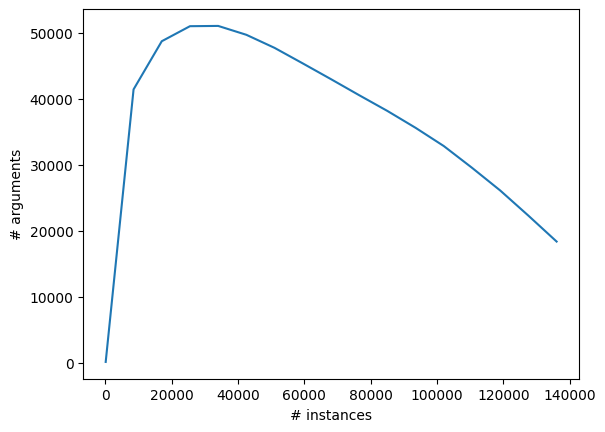

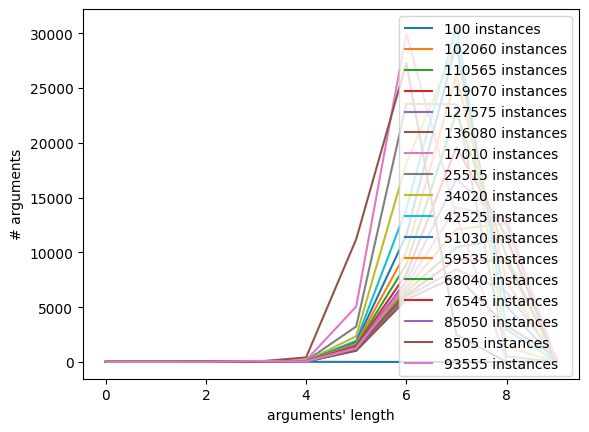

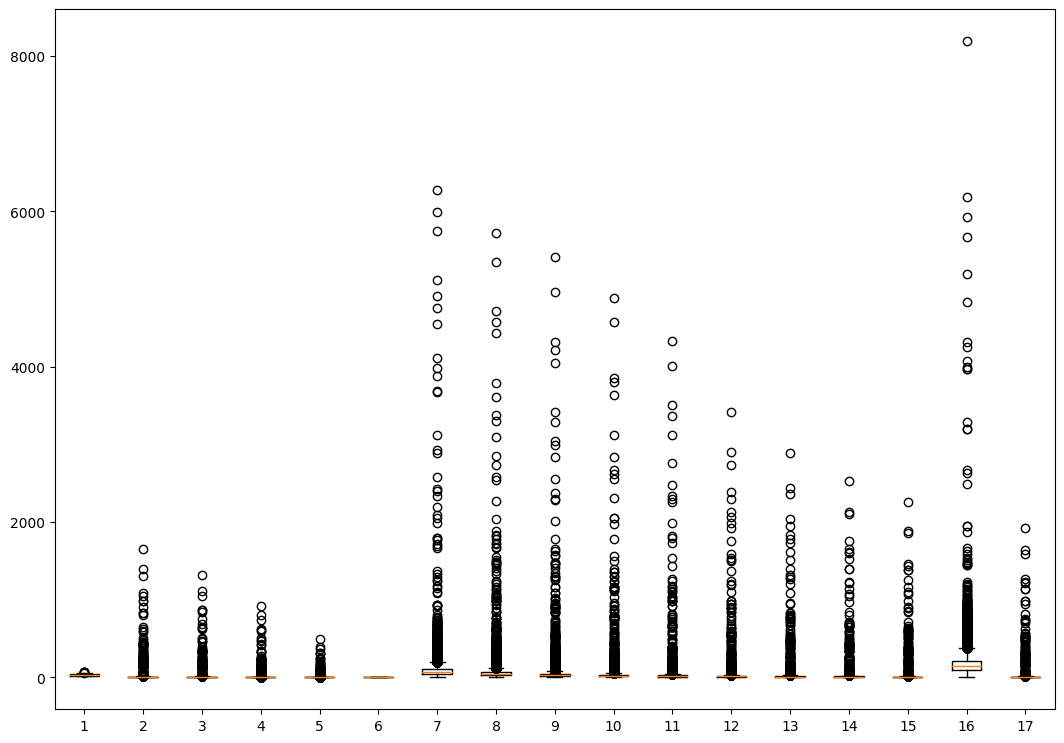

(136080, 127575, 119070, 110565, 102060, 93555, 85050, 76545, 68040, 59535, 51030, 42525, 34020, 25515, 17010, 8505, 100) (1.0, 0.5048217089033415, 0.2735664764239476, 0.14520223388052123, 0.07784139359239861, 0.041914821890099985, 0.022122618017876294, 0.011422509498199007, 0.005236942556558932, 0.002006570968666632, 0.0005450505219907198, 0.0001811557738370384, 1.9597468007170882e-05, 0.0, 0.0, 0.0, 0.0)


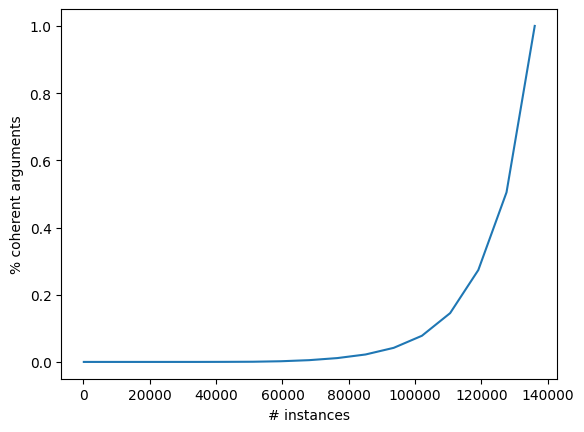

In [21]:
explainer.af_analysis(remove=['adult_'])

In [9]:
#ext_gen = explainer.extension_generator_from_graph()
ext_gen = explainer.extension_generator_from_sat(file='../../saves/adultshort_100_sat.txt')
#max_covi_ext = explainer.make_selection('max_covi_incl', ext_gen)
max_covi_ext = explainer.make_selection('max_card', ext_gen)
res = explainer.apply_inference(max_covi_ext, 'universal')
#print(res)

explainer.display_explanations(verbose=True)

Using pre-processed file...
Reading ../../saves/adultshort_100_sat_preprocessed.txt
Time for selection:  4.993837594985962
Len max_cov_exts:  1
id: 0 coverage: 0 Arg 1/0: None
id: 1 coverage: 13 Arg 1/5: frozenset({'Sex_Female', 'Relationship_Not-in-family', 'Workclass_State-gov'})
id: 2 coverage: 12 Arg 1/8: frozenset({'Sex_Female', 'Age_Age > 48.00', 'Capital Loss_0', 'Hours per week_Hours per week <= 40.00', 'Capital Gain_0'})
id: 3 coverage: 17 Arg 1/8: frozenset({'Relationship_Not-in-family', 'Age_28.00 < Age <= 37.00', 'Race_White'})
id: 4 coverage: 0 Arg 1/0: None
id: 5 coverage: 0 Arg 1/0: None
id: 6 coverage: 10 Arg 1/11: frozenset({'Capital Gain_0', 'Marital Status_Divorced', 'Age_37.00 < Age <= 48.00'})
id: 7 coverage: 0 Arg 1/0: None
id: 8 coverage: 12 Arg 1/9: frozenset({'Marital Status_Divorced', 'Age_Age > 48.00', 'Sex_Male'})
id: 9 coverage: 0 Arg 1/0: None
id: 10 coverage: 0 Arg 1/0: None
id: 11 coverage: 0 Arg 1/0: None
id: 12 coverage: 16 Arg 1/4: frozenset({'Age_Age